## Introduction and Problem

<font size="4">  A software company is doing A/B testing on two price points 39 dollars vs 59 dollars. The company wants to know if increasing the price of its software would lead to descrease in conversion rate. </font>

## Approach

<font size="4"> 
    1. To do Chi-square and Fisher's exact tests to look for association between the price 
    and the conversion rate.
    
    2. To do the power analysis test and assess the time point at which weekly rolling sum of 
    users is stabilized in order to calculate the amount of users needed to do efficient 
    A/B test without running experinet longer that necessary. 
    
    3. Examine user segments to understand where users convert the most.


## Results

<font size="4"> According to Fisher's exact test there is association between price and conversion rate, howerver, the effect size is very small adn the company would generate more profit by charging at a higher price point. According to the power analysis and the weekly rolling sum of users, the A/B test could have been stoppet on Sunday 2015-03-15. According to segmentation analysis friend referral is the most effective way for user conversion. Also, linux users do not buy this software at a higher price point, while users with other operating systems buy this software at simillar conversion rates for both price points. </font>

## Recommendations

<font size="4"> I would recommned investing more resources in targeting the developer community by promoting software at conferences and meetups. It could also be effective to target adds at developers. I would suggest giving discounts to linux developers. </font>

In [1]:
# installing packages
sc.install_pypi_package("pandas==1.0.4")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("imblearn==0.0")
sc.install_pypi_package("scikit-learn==0.23.1")
sc.install_pypi_package("sklearn==0.0")
sc.install_pypi_package("boto3==1.13")
sc.install_pypi_package("seaborn==0.10.1")
sc.install_pypi_package("scipy==1.5.1")
sc.install_pypi_package("statsmodels==0.11.1")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1594216179942_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/a4/5f/1b6e0efab4bfb738478919d40b0e3e1a06e3d9996da45eb62a77e9a090d9/pandas-1.0.4-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/31/b9/6202dcae729998a0ade30e80ac00f616542ef445b088ec970d407dfd41c0/kiwisolver-1.2.0-cp37-cp37m-manylinux1_x86_64.whl

  Usi

In [2]:
# Setting up pySpark session
import sys
import pandas as pd
from pyspark.sql import SparkSession
# create sparksession
spark = SparkSession \
    .builder \
    .appName("insight") \
    .getOrCreate()
test_res = spark.read.option("inferSchema", "true").option("header", True).option("dateFormat", "mmddyyHHss").option("delimiter",",").csv("s3://costly-conversion/test_results.csv")
user_tab = spark.read.option("inferSchema", "true").option("header", True).option("dateFormat", "mmddyy").option("delimiter",",").csv("s3://costly-conversion/user_table.csv")



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
test_res.show(4)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------------------+--------------+------+----------------+----+-----+---------+
|user_id|          timestamp|        source|device|operative_system|test|price|converted|
+-------+-------------------+--------------+------+----------------+----+-----+---------+
| 604839|2015-05-08 03:38:34|  ads_facebook|mobile|             iOS|   0|   39|        0|
| 624057|2015-05-10 21:08:46|    seo-google|mobile|         android|   0|   39|        0|
| 317970|2015-04-04 15:01:23|      ads-bing|mobile|         android|   0|   39|        0|
| 685636|2015-05-07 07:26:01|direct_traffic|mobile|             iOS|   1|   59|        0|
+-------+-------------------+--------------+------+----------------+----+-----+---------+
only showing top 4 rows

In [4]:
user_tab.show(4)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------+-------+-----+-------+
|user_id|       city|country|  lat|   long|
+-------+-----------+-------+-----+-------+
| 510335|    Peabody|    USA|42.53| -70.97|
|  89568|       Reno|    USA|39.54|-119.82|
| 434134|     Rialto|    USA|34.11|-117.39|
| 289769|Carson City|    USA|39.15|-119.74|
+-------+-----------+-------+-----+-------+
only showing top 4 rows

In [5]:
test_res.select("user_id").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

316800

In [6]:
test_res.select("user_id").count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

316800

In [7]:
user_tab.select("user_id").count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

275616

In [8]:
user_tab.select("user_id").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

275616

In [9]:
user_tab.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- user_id: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)

In [10]:
joined = test_res.join(user_tab,on=['user_id'],how='full')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
drop1= ['lat', 'long']
joined = joined.drop(*drop1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
joined.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------------------+--------------+------+----------------+----+-----+---------+------------+-------+
|user_id|          timestamp|        source|device|operative_system|test|price|converted|        city|country|
+-------+-------------------+--------------+------+----------------+----+-----+---------+------------+-------+
|    122|2015-05-06 08:07:23|      ads-bing|mobile|         android|   0|   39|        0|   Inglewood|    USA|
|    148|2015-04-26 08:43:44|     ads_other|   web|         windows|   0|   39|        0|Jacksonville|    USA|
|    192|2015-04-04 18:08:30|    ads-google|   web|             mac|   0|   39|        0|    Freeport|    USA|
|    243|2015-04-02 14:40:35|    seo-google|   web|         windows|   0|   39|        0|  Richardson|    USA|
|    444|2015-05-01 13:05:47|direct_traffic|mobile|           other|   0|   39|        0|    New York|    USA|
+-------+-------------------+--------------+------+----------------+----+-----+---------+------------+-------+
o

In [13]:
joined.select("device").distinct().show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+
|device|
+------+
|mobile|
|   web|
+------+

In [14]:
_cols = joined.columns
joined_cleaned = joined
for _c in _cols:
    count = joined_cleaned.where(joined_cleaned[_c]. isNull()).count()
    print(f"{_c}: {count}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

user_id: 0
timestamp: 0
source: 0
device: 0
operative_system: 0
test: 0
price: 0
converted: 0
city: 41184
country: 41184

In [15]:
from pyspark.sql.functions import to_date, col, date_format
joined1 = joined.withColumn("timestamp", to_date(col("timestamp")))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
joined1.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+----------+--------------+------+----------------+----+-----+---------+------------+-------+
|user_id| timestamp|        source|device|operative_system|test|price|converted|        city|country|
+-------+----------+--------------+------+----------------+----+-----+---------+------------+-------+
|    122|2015-05-06|      ads-bing|mobile|         android|   0|   39|        0|   Inglewood|    USA|
|    148|2015-04-26|     ads_other|   web|         windows|   0|   39|        0|Jacksonville|    USA|
|    192|2015-04-04|    ads-google|   web|             mac|   0|   39|        0|    Freeport|    USA|
|    243|2015-04-02|    seo-google|   web|         windows|   0|   39|        0|  Richardson|    USA|
|    444|2015-05-01|direct_traffic|mobile|           other|   0|   39|        0|    New York|    USA|
+-------+----------+--------------+------+----------------+----+-----+---------+------------+-------+
only showing top 5 rows

In [17]:
#counting instances that are grouped by timestamp, test ($39 or $59), and converted (0-no, 1-yes)
#sorted by timestamp
time = joined1.groupBy("timestamp", "test", "converted").count().sort("timestamp")
time.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+----+---------+-----+
| timestamp|test|converted|count|
+----------+----+---------+-----+
|2015-03-02|   0|        1|   18|
|2015-03-02|   1|        0|  569|
|2015-03-02|   0|        0|  993|
|2015-03-02|   1|        1|    9|
|2015-03-03|   0|        0|  896|
+----------+----+---------+-----+
only showing top 5 rows

In [18]:
# summing counts of *time* table by rolling window of 7 days which results in weeklt_total column
from pyspark.sql.functions import sum
from pyspark.sql.window import Window

w = Window.orderBy(col("timestamp"),col("test"), col("converted")).rowsBetween(-7, 0)
weekly_total = time.withColumn('weekly_total', sum("count").over(w))
weekly_total = weekly_total.withColumn("weekday_number",date_format(col("timestamp"), "u"))
weekly_total.filter("weekday_number==1 and test==1 and converted==1").sort("timestamp","converted").show(40)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+----+---------+-----+------------+--------------+
| timestamp|test|converted|count|weekly_total|weekday_number|
+----------+----+---------+-----+------------+--------------+
|2015-03-02|   1|        1|    9|        1589|             1|
|2015-03-09|   1|        1|   10|        5958|             1|
|2015-03-16|   1|        1|    5|        5454|             1|
|2015-03-23|   1|        1|    8|        5727|             1|
|2015-03-30|   1|        1|    7|        5811|             1|
|2015-04-06|   1|        1|   12|        5588|             1|
|2015-04-13|   1|        1|    6|        5968|             1|
|2015-04-20|   1|        1|    4|        5751|             1|
|2015-04-27|   1|        1|    8|        5855|             1|
|2015-05-04|   1|        1|    9|        5805|             1|
|2015-05-11|   1|        1|    6|        5770|             1|
|2015-05-18|   1|        1|   10|        5777|             1|
|2015-05-25|   1|        1|    4|        5584|             1|
+-------

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

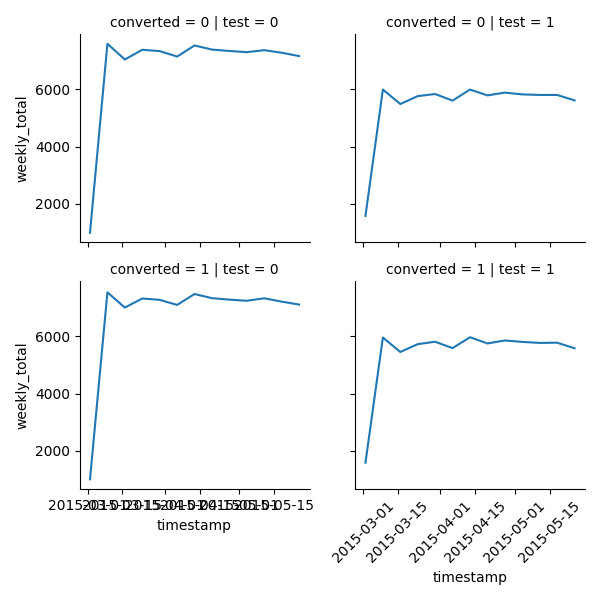

In [19]:
# plotting weekly_totals by test and convertion 
import seaborn as sns
import matplotlib.pyplot as plt
plt.clf()
weekly_total_pd = weekly_total.filter('weekday_number == 1').toPandas()
g = sns.FacetGrid(weekly_total_pd, col="test", row ="converted")
g.map(sns.lineplot, "timestamp", "weekly_total")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
%matplot plt

In [20]:
#total counts by test and converted
joined1.groupBy("test", "converted").count().sort("test").show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+---------+------+
|test|converted| count|
+----+---------+------+
|   0|        1|  4035|
|   0|        0|198692|
|   1|        1|  1773|
|   1|        0|112300|
+----+---------+------+

<font size="4"> Both chi-square test and Fisher's exact test show that there is an association between software price point $39 vs $59 and conversion rate. However, the effect size is very small, 0.02-0.015 = 0.005 or 0.5 %. Since conversion rates for both price points are very simillar, it becomes more profitable to charge a higher price point for this software. </font>

In [21]:
# Chi-Square Test
from scipy.stats import chi2
import numpy as np
T = np.array([3716.66, 2091.34, 199010, 111981.66])
O = np.array([4035, 1773, 198692, 112300])

D = np.sum(np.square(T-O)/T)

pvalue = chi2.sf(D, df=1)

print("distance d: {0}\np-value: {1}".format(D,pvalue))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

distance d: 77.13676056788492
p-value: 1.5952039442802944e-18

In [22]:
# Fisher's Exact Test
from scipy.stats import stats

oddsratio, pvalue = stats.fisher_exact([[4035, 1773], [198692, 112300]])
print(oddsratio, pvalue)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1.2862760354580207 6.685400351578837e-19

<font size="4"> About 1090 sample size per cell should be used for this A/B test. This means that the test could have been stopped when total user traffic was at least 4360 and it had a stable rolling week sum, both of which occured 
on Monday 2015-03-09, meaning the data should include the week of Monday 2015-03-09 through Sunday 2015-03-15. </font>

In [23]:
#Sample Size for power of 80% and a small effect size of 0.1
from statsmodels.stats.power import GofChisquarePower
effect =0.1
alpha = 0.05
power = 0.8
analysis = GofChisquarePower()
result = analysis.solve_power(effect, power=power, n_bins=4, alpha=alpha)
print('Sample Size: %.3f' % result)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Sample Size: 1090.256

In [24]:
joined1.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+----------+--------------+------+----------------+----+-----+---------+------------+-------+
|user_id| timestamp|        source|device|operative_system|test|price|converted|        city|country|
+-------+----------+--------------+------+----------------+----+-----+---------+------------+-------+
|    122|2015-05-06|      ads-bing|mobile|         android|   0|   39|        0|   Inglewood|    USA|
|    148|2015-04-26|     ads_other|   web|         windows|   0|   39|        0|Jacksonville|    USA|
|    192|2015-04-04|    ads-google|   web|             mac|   0|   39|        0|    Freeport|    USA|
|    243|2015-04-02|    seo-google|   web|         windows|   0|   39|        0|  Richardson|    USA|
|    444|2015-05-01|direct_traffic|mobile|           other|   0|   39|        0|    New York|    USA|
+-------+----------+--------------+------+----------------+----+-----+---------+------------+-------+
only showing top 5 rows

In [25]:
#Sorting *source* column into 4 categories (search, ads, direct_traffic, friend_referral)
from pyspark.sql.functions import when
joined_source = joined1.withColumn("source",when(joined1.source.like("seo%"), 'search')\
                      .when(joined1.source.like("ads%"), 'ads')\
                      .when(joined1.source.like("%direct_traffic%"), 'direct_traffic')\
                      .when(joined1.source.like("%friend_referral%"), 'friend_referral')\
                      .otherwise('other'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<font size="4">Majority of softwae promotion efforts are focused on ads.</font>

In [26]:
# where test is 0 ($39), count by converted and source
sources = joined_source.filter("test==0").groupBy("converted", "source").count().sort("converted", "source")
sources.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+------+
|converted|         source| count|
+---------+---------------+------+
|        0|            ads|108440|
|        0| direct_traffic| 38234|
|        0|friend_referral| 12587|
|        0|         search| 39431|
|        1|            ads|  2234|
|        1| direct_traffic|   525|
|        1|friend_referral|   548|
|        1|         search|   728|
+---------+---------------+------+

<font size="4"> It is more effective to promote this software via friend referral (4.2% conversion) as opposed to ads (2% conversion), which is where currently a lot of the money is being spent to promote the software. </font>

In [27]:
sources.withColumn('percent', col('count')/sum('count').over(Window.partitionBy("source"))*100)\
        .sort("converted", "source").show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+------+------------------+
|converted|         source| count|           percent|
+---------+---------------+------+------------------+
|        0|            ads|108440| 97.98145905994181|
|        0| direct_traffic| 38234| 98.64547588947083|
|        0|friend_referral| 12587| 95.82794061667302|
|        0|         search| 39431| 98.18720585671954|
|        1|            ads|  2234| 2.018540940058189|
|        1| direct_traffic|   525|1.3545241105291674|
|        1|friend_referral|   548| 4.172059383326989|
|        1|         search|   728|1.8127941432804602|
+---------+---------------+------+------------------+

<font size="4"> Somewhat more traffic occurs via mobile than web. </font>

In [28]:
# Somewhat more traffic occurs via mobile than web.
devices = joined_source.filter("test==0").groupBy("converted", "device").count().sort("converted", "device")
devices.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+------+------+
|converted|device| count|
+---------+------+------+
|        0|mobile|118086|
|        0|   web| 80606|
|        1|mobile|  2395|
|        1|   web|  1640|
+---------+------+------+

<font size="4"> Conversion rates for mobile and web are simillar, ~2% each. </font>

In [29]:
# conversion rates for mobile and web are simillar
devices.withColumn('percent', col('count')/sum('count').over(Window.partitionBy("device"))*100)\
        .sort("converted", "device").show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+------+------+------------------+
|converted|device| count|           percent|
+---------+------+------+------------------+
|        0|mobile|118086| 98.01213469343713|
|        0|   web| 80606| 98.00598205383848|
|        1|mobile|  2395|1.9878653065628606|
|        1|   web|  1640|1.9940179461615155|
+---------+------+------+------------------+

In [30]:
os = joined_source.filter("test==0").groupBy("converted", "operative_system").count().sort("converted", "operative_system")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<font size="4"> All operating systems convert at similar rates between 1.5% and 2.5%. </font>

In [31]:
os.withColumn('percent', col('count')/sum('count').over(Window.partitionBy("operative_system"))*100)\
        .sort("converted", "operative_system").show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+----------------+-----+------------------+
|converted|operative_system|count|           percent|
+---------+----------------+-----+------------------+
|        0|         android|47421| 98.36341008089607|
|        0|             iOS|60396| 97.64125778029262|
|        0|           linux| 2173| 98.45944721341186|
|        0|             mac|15949| 97.45203470609802|
|        0|           other|10351| 98.59973328253001|
|        0|         windows|62402| 98.13023855577046|
|        1|         android|  789|1.6365899191039206|
|        1|             iOS| 1459|  2.35874221970738|
|        1|           linux|   34|1.5405527865881288|
|        1|             mac|  417| 2.547965293901992|
|        1|           other|  147|1.4002667174699943|
|        1|         windows| 1189|1.8697614442295292|
+---------+----------------+-----+------------------+

In [32]:
joined_source.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+----------+--------------+------+----------------+----+-----+---------+------------+-------+
|user_id| timestamp|        source|device|operative_system|test|price|converted|        city|country|
+-------+----------+--------------+------+----------------+----+-----+---------+------------+-------+
|    122|2015-05-06|           ads|mobile|         android|   0|   39|        0|   Inglewood|    USA|
|    148|2015-04-26|           ads|   web|         windows|   0|   39|        0|Jacksonville|    USA|
|    192|2015-04-04|           ads|   web|             mac|   0|   39|        0|    Freeport|    USA|
|    243|2015-04-02|        search|   web|         windows|   0|   39|        0|  Richardson|    USA|
|    444|2015-05-01|direct_traffic|mobile|           other|   0|   39|        0|    New York|    USA|
+-------+----------+--------------+------+----------------+----+-----+---------+------------+-------+
only showing top 5 rows

In [33]:
# Grouping by converted, source and operating system

sourceANDos = joined_source.filter("test==0").groupBy("converted", "source", "operative_system").count().sort("converted", "source", "operative_system")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<font size="4"> Calculating percent converted by source and operating system when software price is $39. Friend referrals convert at high rate than any other source, and within that linux users converting at the highest rate of all, 5.1%. </font>

In [34]:
# Calculating percent converted by source and operating system
sourceANDos.withColumn('percent', col('count')/sum('count').over(Window.partitionBy("source","operative_system"))*100)\
        .sort("converted", "source", "operative_system").filter("converted==1").show(100)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+----------------+-----+------------------+
|converted|         source|operative_system|count|           percent|
+---------+---------------+----------------+-----+------------------+
|        1|            ads|         android|  439|1.6966839298137126|
|        1|            ads|             iOS|  804|2.3584628923437956|
|        1|            ads|           linux|   18|1.4434643143544506|
|        1|            ads|             mac|  228|2.6009582477754964|
|        1|            ads|           other|   88|1.5130674002751032|
|        1|            ads|         windows|  657|1.8835469166594996|
|        1| direct_traffic|         android|   88|0.9360706307839592|
|        1| direct_traffic|             iOS|  198|1.6747018523217458|
|        1| direct_traffic|           linux|    4|1.0666666666666667|
|        1| direct_traffic|             mac|   64|2.0466901183242725|
|        1| direct_traffic|           other|   16|0.7862407862407862|
|        1| direct_t

<font size="4"> Calculating percent converted by source and operating system when software price is higher. 
Here, even though more linux users were friend referred (231) as compared when the price was lower (131), no linux user bought the software at the higher price point. In addition, no linux software user, whatever the source, bought the software at a higher price. However, other operating systems user conversion rates were similar for the two price points. </font>

In [35]:
sourceANDos1 = joined_source.filter("test==1").groupBy("converted", "source", "operative_system").count().sort("converted", "source", "operative_system")
sourceANDos1.withColumn('percent', col('count')/sum('count').over(Window.partitionBy("source","operative_system"))*100)\
        .sort("converted", "source", "operative_system").filter("converted==1").show(100)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+----------------+-----+------------------+
|converted|         source|operative_system|count|           percent|
+---------+---------------+----------------+-----+------------------+
|        1|            ads|         android|  182| 1.243509155506969|
|        1|            ads|             iOS|  373|2.0158893152461763|
|        1|            ads|             mac|   97|1.9631653511434932|
|        1|            ads|           other|   30| 0.975292587776333|
|        1|            ads|         windows|  307|1.5138813550964052|
|        1| direct_traffic|         android|   36|0.6857142857142857|
|        1| direct_traffic|             iOS|   85|1.3659006909850553|
|        1| direct_traffic|             mac|   25|1.6244314489928524|
|        1| direct_traffic|           other|    9|0.8364312267657992|
|        1| direct_traffic|         windows|   63|0.8796425579447082|
|        1|friend_referral|         android|   51|3.0778515389257697|
|        1|friend_re